# Goal:

Create a Planner Agent, that creates a plan for a given task given by the user, this planner agent should be able to ask questions to the user.

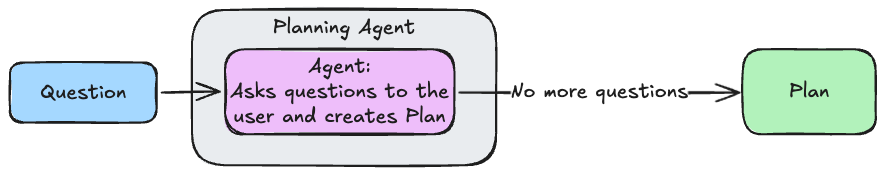

# Define LLM Connection

We define the LLM

In [ ]:
from pydantic_settings import BaseSettings
import os

class Settings(BaseSettings):
    GOOGLE_API_KEY: str
    MODEL_NAME: str = "google-gla:gemini-2.5-flash"
    CONTEXT7_API_KEY: str
    class Config:
        #ignore extra fields
        extra = "ignore"
        env_file = ".env"

settings = Settings()
os.environ["GOOGLE_API_KEY"] = settings.GOOGLE_API_KEY

# Define Agent

We define the Planer Agent with structured output and system prompt

In [28]:
from pydantic_ai import Agent
from pydantic import BaseModel, Field
  
class PlanOutput(BaseModel):
    outline: str = Field(description="The outline of the report")

planning_agent = Agent(
    model=settings.MODEL_NAME,
    system_prompt="""You are a planning assistant. Your Job is to create an outline for a report for an user. You have access to tools to help you answer questions.
1. Assess which tool you should use to answer the question.
2. Use get_human_in_the_loop to get user input in case of ambiguity. Provide your question.
3. Use create_plan to create a plan based on what you understand about what the user is asking for. The default outline is the following:
    - Summary 
    - Introduction
    - Sections and subsections
    - Conclusion
    - References
4. If you think the question is too complex or not relevant, first use get_human_in_the_loop to get user input. if user input is ambiguous, then respond with 'I don't know how to help you with that'.
5. After making the plan, use human_in_the_loop to ask the user if the plan looks good, if the user asks for changes, use_create_plan with the changes made by the user. If the user is happy with the plan, respond with the final plan.
""",
    output_type=PlanOutput
)

# Define Tools

We define 2 tools, one for planning and the other to include us in the loop

In [29]:
from pydantic import BaseModel
from pydantic_ai import RunContext

# Human in the loop tool
class GetHumanInTheLoopInput(BaseModel):
    """Input for getting more information"""
    questions: str

class GetHumanInTheLoopOutput(BaseModel):
    """Response for getting more information"""
    answer: str
    
@planning_agent.tool
def get_human_in_the_loop(_: RunContext[GetHumanInTheLoopInput], question: str) -> GetHumanInTheLoopOutput:
    input_str = input(f"Please provide your input for the question > '{question}': ")
    return GetHumanInTheLoopOutput(answer=input_str)

# Planning tool
class GetPlanInput(BaseModel):
    """Input for getting a plan"""
    instructions_for_plan: str

class GetPlanOutput(BaseModel):
    """Response for getting a plan"""
    plan: str

@planning_agent.tool
async def get_plan(_: RunContext[GetPlanInput], instructions_for_plan: str) -> GetPlanOutput:
    outline_agent = Agent(settings.MODEL_NAME,
                instructions="You are an experienced planner for a research project, you will be given a query from the user and you need to make an outline of the report to give the user about it, and what to search for in the web in order to create the report",
                output_type=GetPlanOutput)
    result = await outline_agent.run(instructions_for_plan)
    return GetPlanOutput(plan=result.output.plan)


# Run the Planner Agent

In [31]:
user_request = "How to use pydantic-ai"
print(user_request)
# result = await planning_agent.run(user_request)

nodes = []
async with planning_agent.iter(
    user_request,
) as agent_run:
    async for node in agent_run:
        # Each node represents a step in the agent's execution
        print(node)
        nodes.append(node)

2025-09-03 17:22:06,822 - google_genai.models - INFO - AFC is enabled with max remote calls: 10.


How to use pydantic-ai
UserPromptNode(user_prompt='How to use pydantic-ai', instructions=None, instructions_functions=[], system_prompts=("You are a planning assistant. Your Job is to create an outline for a report for an user. You have access to tools to help you answer questions.\n1. Assess which tool you should use to answer the question.\n2. Use get_human_in_the_loop to get user input in case of ambiguity. Provide your question.\n3. Use create_plan to create a plan based on what you understand about what the user is asking for. The default outline is the following:\n    - Summary \n    - Introduction\n    - Sections and subsections\n    - Conclusion\n    - References\n4. If you think the question is too complex or not relevant, first use get_human_in_the_loop to get user input. if user input is ambiguous, then respond with 'I don't know how to help you with that'.\n5. After making the plan, use human_in_the_loop to ask the user if the plan looks good, if the user asks for changes, 

2025-09-03 17:22:08,494 - httpx - INFO - HTTP Request: POST https://generativelanguage.googleapis.com/v1beta/models/gemini-2.5-flash:generateContent "HTTP/1.1 200 OK"
2025-09-03 17:22:08,557 - google_genai.models - INFO - AFC is enabled with max remote calls: 10.


CallToolsNode(model_response=ModelResponse(parts=[ToolCallPart(tool_name='get_plan', args={'instructions_for_plan': "Outline for a report on 'How to use pydantic-ai'"}, tool_call_id='pyd_ai_6adc26671f6e45388fa57f74ad2dde42')], usage=RequestUsage(input_tokens=371, output_tokens=195, details={'thoughts_tokens': 162, 'text_prompt_tokens': 371}), model_name='gemini-2.5-flash', timestamp=datetime.datetime(2025, 9, 3, 22, 22, 8, 497391, tzinfo=datetime.timezone.utc), provider_name='google-gla', provider_details={'finish_reason': 'STOP'}, provider_response_id='kL-4aKPmJv-eqtsP_dXfuAw'))


2025-09-03 17:22:15,950 - httpx - INFO - HTTP Request: POST https://generativelanguage.googleapis.com/v1beta/models/gemini-2.5-flash:generateContent "HTTP/1.1 200 OK"
2025-09-03 17:22:15,954 - google_genai.models - INFO - AFC is enabled with max remote calls: 10.


ModelRequestNode(request=ModelRequest(parts=[ToolReturnPart(tool_name='get_plan', content=GetPlanOutput(plan='**Report Outline: How to Use pydantic-ai for Structured AI Applications**\n\n**I. Introduction**\n    A. What is pydantic-ai?\n        1. Brief overview of Pydantic\n        2. How `pydantic-ai` extends Pydantic for AI applications (e.g., structured output from LLMs)\n    B. Why use `pydantic-ai`?\n        1. Benefits: Reliability, maintainability, clear data contracts, error handling\n        2. Target audience: AI developers, data scientists, ML engineers\n    C. Report Goals\n\n**II. Core Concepts of Pydantic (Foundational)**\n    A. `BaseModel`: Defining data schemas\n    B. Field Types: Standard Pydantic types (str, int, float, bool, list, dict, Optional)\n    C. Validation: Automatic data validation on instantiation\n    D. Data Export: `model_dump()`, `model_dump_json()`\n\n**III. Integrating Pydantic with AI: The `pydantic-ai` Approach**\n    A. The Need for Structured 

2025-09-03 17:22:16,987 - httpx - INFO - HTTP Request: POST https://generativelanguage.googleapis.com/v1beta/models/gemini-2.5-flash:generateContent "HTTP/1.1 200 OK"


CallToolsNode(model_response=ModelResponse(parts=[ToolCallPart(tool_name='get_human_in_the_loop', args={'question': 'Does this plan look good?'}, tool_call_id='pyd_ai_f23af70e7d2d48d8ae1866a980fef4f4')], usage=RequestUsage(input_tokens=1319, output_tokens=78, details={'thoughts_tokens': 52, 'text_prompt_tokens': 1319}), model_name='gemini-2.5-flash', timestamp=datetime.datetime(2025, 9, 3, 22, 22, 16, 988975, tzinfo=datetime.timezone.utc), provider_name='google-gla', provider_details={'finish_reason': 'STOP'}, provider_response_id='mb-4aJiHCce5qtsP6PDtyQw'))


2025-09-03 17:22:27,181 - google_genai.models - INFO - AFC is enabled with max remote calls: 10.


ModelRequestNode(request=ModelRequest(parts=[ToolReturnPart(tool_name='get_human_in_the_loop', content=GetHumanInTheLoopOutput(answer='nop'), tool_call_id='pyd_ai_f23af70e7d2d48d8ae1866a980fef4f4', timestamp=datetime.datetime(2025, 9, 3, 22, 22, 27, 179583, tzinfo=datetime.timezone.utc))]))


2025-09-03 17:22:28,303 - httpx - INFO - HTTP Request: POST https://generativelanguage.googleapis.com/v1beta/models/gemini-2.5-flash:generateContent "HTTP/1.1 200 OK"


CallToolsNode(model_response=ModelResponse(parts=[ToolCallPart(tool_name='get_human_in_the_loop', args={'question': 'What changes would you like to make to the plan?'}, tool_call_id='pyd_ai_3daa44cf1c784789ae00eb9515b39291')], usage=RequestUsage(input_tokens=1372, cache_read_tokens=886, output_tokens=79, details={'cached_content_tokens': 886, 'thoughts_tokens': 48, 'text_prompt_tokens': 1372, 'text_cache_tokens': 886}), model_name='gemini-2.5-flash', timestamp=datetime.datetime(2025, 9, 3, 22, 22, 28, 305500, tzinfo=datetime.timezone.utc), provider_name='google-gla', provider_details={'finish_reason': 'STOP'}, provider_response_id='pL-4aO6NHJqqqtsP8ubEuA0'))


2025-09-03 17:22:36,975 - google_genai.models - INFO - AFC is enabled with max remote calls: 10.


ModelRequestNode(request=ModelRequest(parts=[ToolReturnPart(tool_name='get_human_in_the_loop', content=GetHumanInTheLoopOutput(answer='to be simpler'), tool_call_id='pyd_ai_3daa44cf1c784789ae00eb9515b39291', timestamp=datetime.datetime(2025, 9, 3, 22, 22, 36, 973658, tzinfo=datetime.timezone.utc))]))


2025-09-03 17:22:38,288 - httpx - INFO - HTTP Request: POST https://generativelanguage.googleapis.com/v1beta/models/gemini-2.5-flash:generateContent "HTTP/1.1 200 OK"
2025-09-03 17:22:38,346 - google_genai.models - INFO - AFC is enabled with max remote calls: 10.


CallToolsNode(model_response=ModelResponse(parts=[ToolCallPart(tool_name='get_plan', args={'instructions_for_plan': "Create a simpler outline for a report on 'How to use pydantic-ai'. The outline should be high-level with fewer sections and sub-sections."}, tool_call_id='pyd_ai_9746f2d0ba954ff6b85d5af311e9de5c')], usage=RequestUsage(input_tokens=1432, cache_read_tokens=884, output_tokens=102, details={'cached_content_tokens': 884, 'thoughts_tokens': 51, 'text_prompt_tokens': 1432, 'text_cache_tokens': 884}), model_name='gemini-2.5-flash', timestamp=datetime.datetime(2025, 9, 3, 22, 22, 38, 291792, tzinfo=datetime.timezone.utc), provider_name='google-gla', provider_details={'finish_reason': 'STOP'}, provider_response_id='rr-4aOrLGpOJqtsPqY-EgA0'))


2025-09-03 17:22:42,976 - httpx - INFO - HTTP Request: POST https://generativelanguage.googleapis.com/v1beta/models/gemini-2.5-flash:generateContent "HTTP/1.1 200 OK"
2025-09-03 17:22:42,982 - google_genai.models - INFO - AFC is enabled with max remote calls: 10.


ModelRequestNode(request=ModelRequest(parts=[ToolReturnPart(tool_name='get_plan', content=GetPlanOutput(plan='Report Outline: \'How to use pydantic-ai\'\n\n1.  Introduction\n    *   What is pydantic-ai?\n    *   Key benefits and use cases.\n2.  Getting Started\n    *   Installation steps.\n    *   Basic example: Defining a simple AI model with pydantic-ai.\n3.  Core Features\n    *   Data validation and type hinting.\n    *   Generating structured outputs from AI models.\n4.  Practical Application\n    *   A simple end-to-end example of using pydantic-ai with an AI model.\n5.  Conclusion\n    *   Summary of pydantic-ai\'s value.\n\nWeb Search Queries to gather information:\n\n*   "pydantic-ai official documentation"\n*   "pydantic-ai installation guide"\n*   "pydantic-ai basic usage examples"\n*   "pydantic-ai data validation features"\n*   "pydantic-ai structured output generation"\n*   "how to integrate pydantic-ai with LLMs"'), tool_call_id='pyd_ai_9746f2d0ba954ff6b85d5af311e9de5c',

2025-09-03 17:22:43,826 - httpx - INFO - HTTP Request: POST https://generativelanguage.googleapis.com/v1beta/models/gemini-2.5-flash:generateContent "HTTP/1.1 200 OK"


CallToolsNode(model_response=ModelResponse(parts=[ToolCallPart(tool_name='get_human_in_the_loop', args={'question': 'Does this simpler plan look good?'}, tool_call_id='pyd_ai_2f29664e2d8643b4af03d63d156c9e53')], usage=RequestUsage(input_tokens=1751, cache_read_tokens=901, output_tokens=74, details={'cached_content_tokens': 901, 'thoughts_tokens': 47, 'text_prompt_tokens': 1751, 'text_cache_tokens': 901}), model_name='gemini-2.5-flash', timestamp=datetime.datetime(2025, 9, 3, 22, 22, 43, 829883, tzinfo=datetime.timezone.utc), provider_name='google-gla', provider_details={'finish_reason': 'STOP'}, provider_response_id='s7-4aM6NPMK7qtsP3bfm-Q8'))


2025-09-03 17:22:53,496 - google_genai.models - INFO - AFC is enabled with max remote calls: 10.


ModelRequestNode(request=ModelRequest(parts=[ToolReturnPart(tool_name='get_human_in_the_loop', content=GetHumanInTheLoopOutput(answer='okay'), tool_call_id='pyd_ai_2f29664e2d8643b4af03d63d156c9e53', timestamp=datetime.datetime(2025, 9, 3, 22, 22, 53, 495544, tzinfo=datetime.timezone.utc))]))


2025-09-03 17:22:55,321 - httpx - INFO - HTTP Request: POST https://generativelanguage.googleapis.com/v1beta/models/gemini-2.5-flash:generateContent "HTTP/1.1 200 OK"


CallToolsNode(model_response=ModelResponse(parts=[ToolCallPart(tool_name='final_result', args={'outline': 'Report Outline: \'How to use pydantic-ai\'\n\n1.  Introduction\n    *   What is pydantic-ai?\n    *   Key benefits and use cases.\n2.  Getting Started\n    *   Installation steps.\n    *   Basic example: Defining a simple AI model with pydantic-ai.\n3.  Core Features\n    *   Data validation and type hinting.\n    *   Generating structured outputs from AI models.\n4.  Practical Application\n    *   A simple end-to-end example of using pydantic-ai with an AI model.\n5.  Conclusion\n    *   Summary of pydantic-ai\'s value.\n\nWeb Search Queries to gather information:\n\n*   "pydantic-ai official documentation"\n*   "pydantic-ai installation guide"\n*   "pydantic-ai basic usage examples"\n*   "pydantic-ai data validation features"\n*   "pydantic-ai structured output generation"\n*   "how to integrate pydantic-ai with LLMs"'}, tool_call_id='pyd_ai_d1faf3ad3c394e08a35be690895d25b6')], 

In [33]:
print(nodes[-1].data.output.outline)

Report Outline: 'How to use pydantic-ai'

1.  Introduction
    *   What is pydantic-ai?
    *   Key benefits and use cases.
2.  Getting Started
    *   Installation steps.
    *   Basic example: Defining a simple AI model with pydantic-ai.
3.  Core Features
    *   Data validation and type hinting.
    *   Generating structured outputs from AI models.
4.  Practical Application
    *   A simple end-to-end example of using pydantic-ai with an AI model.
5.  Conclusion
    *   Summary of pydantic-ai's value.

Web Search Queries to gather information:

*   "pydantic-ai official documentation"
*   "pydantic-ai installation guide"
*   "pydantic-ai basic usage examples"
*   "pydantic-ai data validation features"
*   "pydantic-ai structured output generation"
*   "how to integrate pydantic-ai with LLMs"


## Conclusion

In this notebook, we demonstrated how to create a sophisticated **Planner Agent** that can create structured plans for complex tasks:

### Key Takeaways

1. **Agent Coordination**: Built a planner agent that creates plans and hands them off to other agents for execution
2. **Human-in-the-Loop**: Implemented interactive tools that allow the agent to ask clarifying questions when faced with ambiguous requests
3. **Nested Agent Architecture**: Created a planning tool that internally uses another specialized agent for outline generation
4. **Structured Planning Output**: Used Pydantic models to ensure plans are returned in a consistent, well-defined format
5. **Interactive Planning Process**: Demonstrated how agents can engage users to refine requirements before creating detailed plans

### What We Learned

- **Agent Specialization**: Different agents can be designed for specific tasks (planning vs. execution)
- **Interactive Decision Making**: Agents can pause execution to gather more information from users
- **Hierarchical Agent Systems**: Agents can create and coordinate with other agents to accomplish complex tasks
- **Structured Communication**: Pydantic models ensure reliable data exchange between agents and users
- **Adaptive Planning**: The agent can adjust its planning approach based on user input and clarification

### The Planning Process Demonstrated

1. **Assessment**: Agent evaluates the complexity and clarity of the user request
2. **Clarification**: Uses human-in-the-loop tool to resolve ambiguities
3. **Plan Generation**: Creates a detailed, structured outline using a specialized planning sub-agent
4. **Structured Output**: Returns the plan in a well-defined format ready for execution

This planner agent pattern is essential for building reliable AI systems that can handle complex, multi-step tasks while maintaining user control and transparency in the planning process.
